# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from missingno import missingno as msno
import matplotlib.pyplot as plt
from datetime import datetime

## Datasets to explore:
#### Daily
- dailyActivity_merged.csv
- dailyCalories_merged.csv
- dailyIntensities_merged.csv
- dailySteps_merged.csv
- sleepDay_merged.csv
- weightLogInfo_merged.csv

#### Hourly
- hourlyCalories_merged.csv
- hourlySteps_merged.csv

#### Minutes
- minuteCaloriesNarrow_merged.csv
- minuteIntensitiesNarrow_merged.csv
- minuteMETsNarrow_merged.csv
- minuteSleep_merged.csv
- minuteStepsNarrow_merged.csv

#### Seconds
- heartrate_seconds_merged.csv


`df = pd.read_csv('FitBit-Tracker-Data/Fitabase Data 4.12.16-5.12.16/...')`

In [2]:
def read(name):
    return pd.read_csv(f'FitBit-Tracker-Data/Fitabase Data 4.12.16-5.12.16/{name}.csv')

Read the datasets

In [3]:
# Daily
activity_df = read('dailyActivity_merged')  # Exercise info
sleepday_df = read('sleepDay_merged')       # Sleep
weight_df   = read('weightLogInfo_merged')  # Weight info

# Hourly
calhour_df  = read('hourlyCalories_merged')  # Calories burned per hour
stephour_df = read('hourlySteps_merged')     # Steps taken per hour

# Minutes
calmin_df   = read('minuteCaloriesNarrow_merged')     # Calories burned per minute
intmin_df   = read('minuteIntensitiesNarrow_merged')  # 
mets_df     = read('minuteMETsNarrow_merged')
sleepmin_df = read('minuteSleep_merged')
stepmin_df  = read('minuteStepsNarrow_merged')

# Seconds
heart_df    = read('heartrate_seconds_merged')

### Categories:
- Calories
- Sleep
- Exercise (Intensity, METs, Steps)
- Weight

# Daily

### Daily Activity

In [4]:
activity_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


*Note:* `dailyActivity_merged.csv` is a combination of `dailyCalories_merged.csv`, `dailyIntensities_merged.csv`, and `dailySteps_merged.csv`

### Sleep Day

In [5]:
sleepday_df.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [6]:
# Create a `TotalTimeAwake` column
sleepday_df['TotalTimeAwake'] = sleepday_df.TotalTimeInBed - sleepday_df.TotalMinutesAsleep

### Weight Log Info

In [7]:
weight_df.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [8]:
# weight_df.IsManualReport.value_counts(normalize=True)

The shape of each dataset:

In [9]:
print(f"""
activity_df: {activity_df.shape}
sleepday_df: {sleepday_df.shape}
weight_df:   {weight_df.shape}
""")


activity_df: (940, 15)
sleepday_df: (413, 6)
weight_df:   (67, 8)



In [10]:
# activity_df.shape, sleepday_df.shape, weight_df.shape

## Combine Daily Datasets
We will combine the data from `activity_df`, `sleepday_df`, and `weight_df` into a single dataframe. There will be `NaN` (null) values in the combined dataset because `activity_df` has more data, but it is easier to work with one dataframe rather than multiple dataframes. 

In [11]:
# Create new column with just the date (excluding the time)
sleepday_df['ActivityDate'] = sleepday_df['SleepDay'].apply(lambda x: x[:9].strip())

# weight_df.rename(columns={'Date':'DateTime'}, inplace=True)
weight_df['ActivityDate'] = weight_df['Date'].apply(lambda x: x[:9].strip())

Check for any duplicates

In [12]:
sleepday_df[sleepday_df[['Id', 'ActivityDate']].duplicated(keep=False)]

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalTimeAwake,ActivityDate
160,4388161847,5/5/2016 12:00:00 AM,1,471,495,24,5/5/2016
161,4388161847,5/5/2016 12:00:00 AM,1,471,495,24,5/5/2016
222,4702921684,5/7/2016 12:00:00 AM,1,520,543,23,5/7/2016
223,4702921684,5/7/2016 12:00:00 AM,1,520,543,23,5/7/2016
379,8378563200,4/25/2016 12:00:00 AM,1,388,402,14,4/25/2016
380,8378563200,4/25/2016 12:00:00 AM,1,388,402,14,4/25/2016


In [13]:
# Drop duplicates from sleepday_df
sleepday_df.drop_duplicates(inplace=True)
sleepday_df.reset_index(drop=True, inplace=True)
sleepday_df.shape

(410, 7)

In [14]:
weight_df[weight_df[['Id', 'ActivityDate']].duplicated(keep=False)]

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,ActivityDate


Remove unnecessary columns

In [15]:
# Drop `SleepDay' because we created a new date column
sleepday_df.drop(['SleepDay'], axis=1, inplace=True)

# Drop 'Data' because we created a new data column and
# drop `LogId` because it will not be used during analysis 
weight_df.drop(['Date', 'LogId'], axis=1, inplace=True)

Combine the datasets

In [16]:
# Combine `activity_df` with `sleepday_df`
daily_df = pd.merge(activity_df, sleepday_df, on=['Id', 'ActivityDate'], how='outer')

# Combine `weight_df` with the previous dataframe
daily_df = pd.merge(daily_df, weight_df, on=['Id', 'ActivityDate'], how='outer')

In [17]:
daily_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalTimeAwake,WeightKg,WeightPounds,Fat,BMI,IsManualReport
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,1985,1.0,327.0,346.0,19.0,NaN,NaN,NaN,NaN,NaN
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,1797,2.0,384.0,407.0,23.0,NaN,NaN,NaN,NaN,NaN
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,1776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,1745,1.0,412.0,442.0,30.0,NaN,NaN,NaN,NaN,NaN
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,1863,2.0,340.0,367.0,27.0,NaN,NaN,NaN,NaN,NaN


### Last changes before saving the dataset

#### Change data type
Convert date from string to datetime object

In [18]:
daily_df['ActivityDate'] = daily_df['ActivityDate'].apply(lambda x: pd.to_datetime(x, format='%m/%d/%Y'))

#### Change User ID
Replace the user ID with `User1`, `User2`, `User3`, etc.

In [19]:
def replace_id(dataframe):
    """
    For anonymization of the users' data, we will replace their unique ID with 
    the row index of the data point (User0, User1, User2, etc.) 
    
    Input: dataframe with 'Id' column
    Returns: anonymized dataframe
    """
    # Original ID
    ids = dataframe['Id'].unique()
    
    # Anonymized ID
    ids_numbers = np.arange(1, len(ids)+1)
    ids_simplified = ['User'+str(x) for x in ids_numbers] 
    
    # Dictionary containing both
    id_dict = dict(zip(ids, ids_simplified))
    
    return dataframe['Id'].apply(lambda x: id_dict[x])

In [20]:
daily_df['Id'] = replace_id(daily_df)

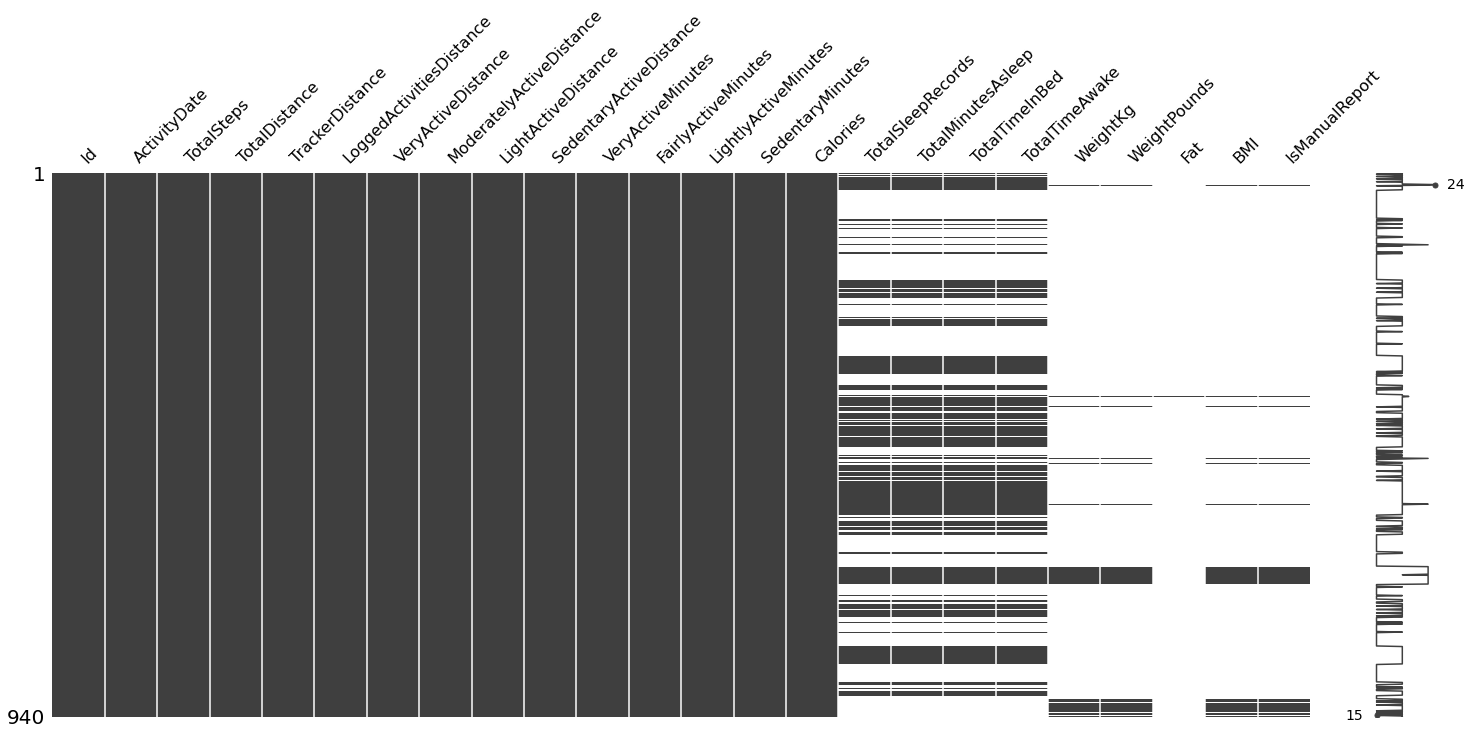

In [21]:
msno.matrix(daily_df)
plt.show()

## Save the dataset

In [22]:
daily_df.to_csv('FitBit-Tracker-Data/Generated-Data/daily.csv', index=False)

# Per Hour

### Calories burned per hour

In [23]:
calhour_df.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


### Steps taken per hour

In [24]:
stephour_df.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [25]:
calhour_df.shape, stephour_df.shape

((22099, 3), (22099, 3))

### Combine the datasets
Both dataframes have the same number of rows

In [27]:
hour_df = pd.merge(calhour_df, stephour_df, on=['Id', 'ActivityHour'], how='outer')
hour_df.head()

,Id,ActivityHour,Calories,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,81,373
1,1503960366,4/12/2016 1:00:00 AM,61,160
2,1503960366,4/12/2016 2:00:00 AM,59,151
3,1503960366,4/12/2016 3:00:00 AM,47,0
4,1503960366,4/12/2016 4:00:00 AM,48,0


### Extract date and time
Special function to separate the date and time from datetime column

In [28]:
def extract_date_hour(dataframe, datetime):
    # Extract date
    dataframe['Date'] = dataframe[datetime].apply(lambda x: x[:9].strip())
    
    # Extract time
    dataframe['FullTime'] = dataframe[datetime].apply(lambda x: (x[9:]).strip())

    # Extract AM/PM
    dataframe['AmPm'] = dataframe.FullTime.apply(lambda x: x[-2:])

    # Extract specific hour
    dataframe['Hour'] = dataframe.FullTime.apply(lambda x: x[:2].replace(':', ''))

    # Combine hour with am/pm
    dataframe['FullHour'] = dataframe.Hour + dataframe.AmPm

    # Drop the extra columns that are no longer needed
    dataframe.drop(['FullTime', 'AmPm', 'Hour', datetime], axis=1, inplace=True)

In [29]:
# Get data and time from column
extract_date_hour(hour_df, 'ActivityHour')

In [32]:
hour_df.head()

,Id,Calories,StepTotal,Date,Hour
0,1503960366,81,373,2016-04-12,0
1,1503960366,61,160,2016-04-12,1
2,1503960366,59,151,2016-04-12,2
3,1503960366,47,0,2016-04-12,3
4,1503960366,48,0,2016-04-12,4


In [31]:
# Convert date and time from string to datetime object
hour_df['Date'] = hour_df['Date'].apply(lambda x: pd.to_datetime(x, format='%m/%d/%Y'))
hour_df['Hour'] = hour_df['FullHour'].apply(lambda x: datetime.strptime(x, '%I%p').hour)
hour_df.drop(['FullHour'], axis=1, inplace=True)

In [33]:
hour_df.isna().sum()

Id           0
Calories     0
StepTotal    0
Date         0
Hour         0
dtype: int64

In [34]:
# Replace ID
hour_df['Id'] = replace_id(hour_df)

In [35]:
hour_df.head()

,Id,Calories,StepTotal,Date,Hour
0,User1,81,373,2016-04-12,0
1,User1,61,160,2016-04-12,1
2,User1,59,151,2016-04-12,2
3,User1,47,0,2016-04-12,3
4,User1,48,0,2016-04-12,4


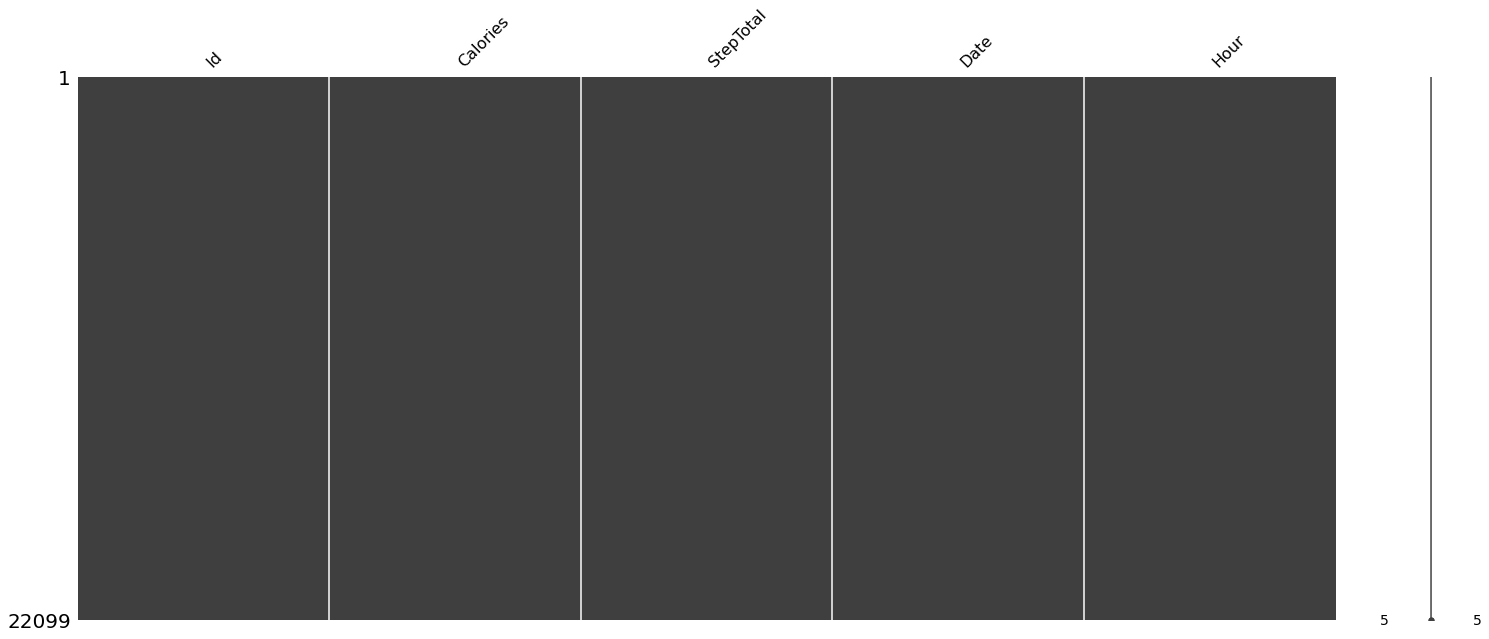

In [37]:
msno.matrix(hour_df)
plt.show()

## Save the dataset

In [38]:
hour_df.to_csv('FitBit-Tracker-Data/Generated-Data/hourly.csv', index=False)

# Per Minute
For each DataFrame, we will group by `Id`, `Date`, and `FullHour`. We will use `groupby` to find the minimum, mean, maximum, and sum of the data

### Calories burned per minute

In [39]:
calmin_df.head()

,Id,ActivityMinute,Calories
0,1503960366,4/12/2016 12:00:00 AM,0.7865
1,1503960366,4/12/2016 12:01:00 AM,0.7865
2,1503960366,4/12/2016 12:02:00 AM,0.7865
3,1503960366,4/12/2016 12:03:00 AM,0.7865
4,1503960366,4/12/2016 12:04:00 AM,0.7865


In [40]:
# extract_date_hour(calmin_df, 'ActivityMinute')

In [41]:
calmin_df.shape

(1325580, 3)

In [42]:
# grouped_cal_df = group_df(calmin_df, 'Calories')
# grouped_cal_df.head()

### Intensity level per minute

In [43]:
intmin_df.head()

,Id,ActivityMinute,Intensity
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0


In [44]:
# extract_date_hour(intmin_df, 'ActivityMinute')

In [45]:
# grouped_intensity_df = group_df(intmin_df, 'Intensity')
# grouped_intensity_df.head()

In [46]:
# We don't need `SumIntensity`
# grouped_intensity_df.drop(['SumIntensity'], axis=1, inplace=True)

### METs per minute

In [47]:
mets_df.head()

,Id,ActivityMinute,METs
0,1503960366,4/12/2016 12:00:00 AM,10
1,1503960366,4/12/2016 12:01:00 AM,10
2,1503960366,4/12/2016 12:02:00 AM,10
3,1503960366,4/12/2016 12:03:00 AM,10
4,1503960366,4/12/2016 12:04:00 AM,10


In [48]:
# extract_date_hour(mets_df, 'ActivityMinute')

In [49]:
# grouped_mets_df = group_df(mets_df, 'METs')
# grouped_mets_df.head()

In [50]:
# We don't need `SumMETs`
# grouped_mets_df.drop(['SumMETs'], axis=1, inplace=True)

### Steps taken per minute

In [57]:
stepmin_df.head()

,Id,ActivityMinute,Steps
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0


In [58]:
# extract_date_hour(stepmin_df, 'ActivityMinute')

In [59]:
# grouped_steps_df = group_df(stepmin_df, 'Steps')
# grouped_steps_df.head()

### Sleep per minute

In [52]:
sleepmin_df.head()

,Id,date,value,logId
0,1503960366,4/12/2016 2:47:30 AM,3,11380564589
1,1503960366,4/12/2016 2:48:30 AM,2,11380564589
2,1503960366,4/12/2016 2:49:30 AM,1,11380564589
3,1503960366,4/12/2016 2:50:30 AM,1,11380564589
4,1503960366,4/12/2016 2:51:30 AM,1,11380564589


**Note**: The `date` column in sleep dataset has data taken in between minutes. For example, the first row has a data point taken at `2:47:30 AM`. We will change it to `2:47:00 AM` and change the other rows with similar data.

In [81]:
def replace_seconds(date):
    new_date = date.replace('30 AM', '00 AM')      # Replace seconds in AM
    new_date = new_date.replace('30 PM', '00 PM')  # Replace seconds in PM
    return new_date

In [99]:
sleepmin_df['ActivityMinute'] = sleepmin_df['date'].apply(replace_seconds)

In [102]:
sleepmin_df.head()

,Id,date,value,logId,ActivityMinute
0,1503960366,4/12/2016 2:47:30 AM,3,11380564589,4/12/2016 2:47:00 AM
1,1503960366,4/12/2016 2:48:30 AM,2,11380564589,4/12/2016 2:48:00 AM
2,1503960366,4/12/2016 2:49:30 AM,1,11380564589,4/12/2016 2:49:00 AM
3,1503960366,4/12/2016 2:50:30 AM,1,11380564589,4/12/2016 2:50:00 AM
4,1503960366,4/12/2016 2:51:30 AM,1,11380564589,4/12/2016 2:51:00 AM


In [105]:
# Drop the original `date` column 
sleepmin_df.drop('date', axis=1, inplace=True)

In [ ]:
calmin_df, intmin_df, mets_df, stepmin_df, sleepmin_df

In [106]:
# Combine calories per minute with intensity per minute
minute_df = pd.merge(calmin_df, intmin_df, on=['Id', 'ActivityMinute'], how='outer')

# # Combine METs per minute with previous dataframe
# minute_df = pd.merge(minute_df, grouped_mets_df, on=['Id', 'Date', 'FullHour'], how='outer')

# # Combine sleep value per minute with previous dataframe
# minute_df = pd.merge(minute_df, grouped_sleep_df, on=['Id', 'Date', 'FullHour'], how='outer')

# # Combine steps per minute with previous dataframe

# minute_df = pd.merge(minute_df, grouped_steps_df, on=['Id', 'Date', 'FullHour'], how='outer')

In [107]:
minute_df.head()

,Id,ActivityMinute,Calories,Intensity
0,1503960366,4/12/2016 12:00:00 AM,0.7865,0
1,1503960366,4/12/2016 12:01:00 AM,0.7865,0
2,1503960366,4/12/2016 12:02:00 AM,0.7865,0
3,1503960366,4/12/2016 12:03:00 AM,0.7865,0
4,1503960366,4/12/2016 12:04:00 AM,0.7865,0


In [35]:
def group_df(dataframe, data):
    """
    Function to combine the dataframes
    """
    # Grouped dataframe
    grouped_df = dataframe.groupby(['Id', 'Date', 'FullHour'], as_index=False).mean()
    grouped_df.drop([data], axis=1, inplace=True)

    # Average data
    grouped_df[f'Avg{data}'] = dataframe.groupby(['Id', 'Date', 'FullHour'], as_index=False).mean()[data]

    # Lowest data
    grouped_df[f'Min{data}'] = dataframe.groupby(['Id', 'Date', 'FullHour'], as_index=False).min()[data]

    # Highest data
    grouped_df[f'Max{data}'] = dataframe.groupby(['Id', 'Date', 'FullHour'], as_index=False).max()[data]

    # Sum data
    grouped_df[f'Sum{data}'] = dataframe.groupby(['Id', 'Date', 'FullHour'], as_index=False).sum()[data]
    
    return grouped_df

In [56]:
grouped_cal_df.shape, grouped_intensity_df.shape, grouped_mets_df.shape, grouped_sleep_df.shape, grouped_steps_df.shape

((22093, 7), (22093, 6), (22093, 6), (3574, 6), (22093, 7))

**Combine the grouped dataframes**

In [57]:
# Combine calories per minute with intensity per minute
minute_df = pd.merge(grouped_cal_df, grouped_intensity_df, on=['Id', 'Date', 'FullHour'], how='outer')

# Combine METs per minute with previous dataframe
minute_df = pd.merge(minute_df, grouped_mets_df, on=['Id', 'Date', 'FullHour'], how='outer')

# Combine sleep value per minute with previous dataframe
minute_df = pd.merge(minute_df, grouped_sleep_df, on=['Id', 'Date', 'FullHour'], how='outer')

# Combine steps per minute with previous dataframe

minute_df = pd.merge(minute_df, grouped_steps_df, on=['Id', 'Date', 'FullHour'], how='outer')

In [58]:
minute_df.head()

,Id,Date,FullHour,AvgCalories,MinCalories,MaxCalories,SumCalories,AvgIntensity,MinIntensity,MaxIntensity,AvgMETs,MinMETs,MaxMETs,Avgvalue,Minvalue,Maxvalue,AvgSteps,MinSteps,MaxSteps,SumSteps
0,1503960366,4/12/2016,10AM,1.649028,0.7865,4.5617,98.941697,0.483333,0.0,1.0,20.966667,10.0,58.0,NaN,NaN,NaN,11.266667,0.0,88.0,676.0
1,1503960366,4/12/2016,10PM,1.080127,0.7865,2.2022,64.807598,0.150000,0.0,1.0,13.733333,10.0,28.0,NaN,NaN,NaN,1.483333,0.0,18.0,89.0
2,1503960366,4/12/2016,11AM,1.266265,0.7865,4.2471,75.975898,0.200000,0.0,1.0,16.100000,10.0,54.0,NaN,NaN,NaN,6.000000,0.0,78.0,360.0
3,1503960366,4/12/2016,11PM,1.358023,0.7865,2.6741,81.481398,0.350000,0.0,1.0,17.266667,10.0,34.0,NaN,NaN,NaN,5.633333,0.0,34.0,338.0
4,1503960366,4/12/2016,12AM,1.355402,0.7865,2.8314,81.324098,0.333333,0.0,1.0,17.233333,10.0,36.0,NaN,NaN,NaN,6.216667,0.0,41.0,373.0


In [59]:
minute_df.shape

(22114, 20)

**NOTE:** We won't be saving this dataset yet because we are going to add the heartrate dataset to it.

# Per Second
### Heartrate per second

In [60]:
heart_df.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [61]:
heart_df.shape

(2483658, 3)

In [62]:
extract_date_hour(heart_df, 'Time')

In [63]:
heart_df.head()

,Id,Value,Date,FullHour
0,2022484408,97,4/12/2016,7AM
1,2022484408,102,4/12/2016,7AM
2,2022484408,105,4/12/2016,7AM
3,2022484408,103,4/12/2016,7AM
4,2022484408,101,4/12/2016,7AM


In [64]:
grouped_heartrate_df = group_df(heart_df, 'Value')
grouped_heartrate_df.head()

,Id,Date,FullHour,AvgValue,MinValue,MaxValue,SumValue
0,2022484408,4/12/2016,10AM,106.716075,60,134,51117
1,2022484408,4/12/2016,11AM,67.767157,55,90,27649
2,2022484408,4/12/2016,12PM,66.230570,56,89,25565
3,2022484408,4/12/2016,1PM,83.687500,60,112,17407
4,2022484408,4/12/2016,2PM,80.577093,59,107,36582


In [65]:
# We don't need the sum of heartrates
grouped_heartrate_df.drop(['SumValue'], axis=1, inplace=True)

## Combine Minutes and Seconds datasets

In [66]:
# Combine heartrate dataframe with grouped minutes dataframe
minute_df = pd.merge(minute_df, grouped_heartrate_df, on=['Id', 'Date', 'FullHour'], how='outer')

In [67]:
# Convert date and time from string to datetime object
minute_df['Date'] = minute_df['Date'].apply(lambda x: pd.to_datetime(x, format='%m/%d/%Y'))
minute_df['Hour'] = minute_df['FullHour'].apply(lambda x: datetime.strptime(x, '%I%p').hour)
minute_df.drop(['FullHour'], axis=1, inplace=True)

In [68]:
# Replace ID
minute_df['Id'] = replace_id(minute_df)

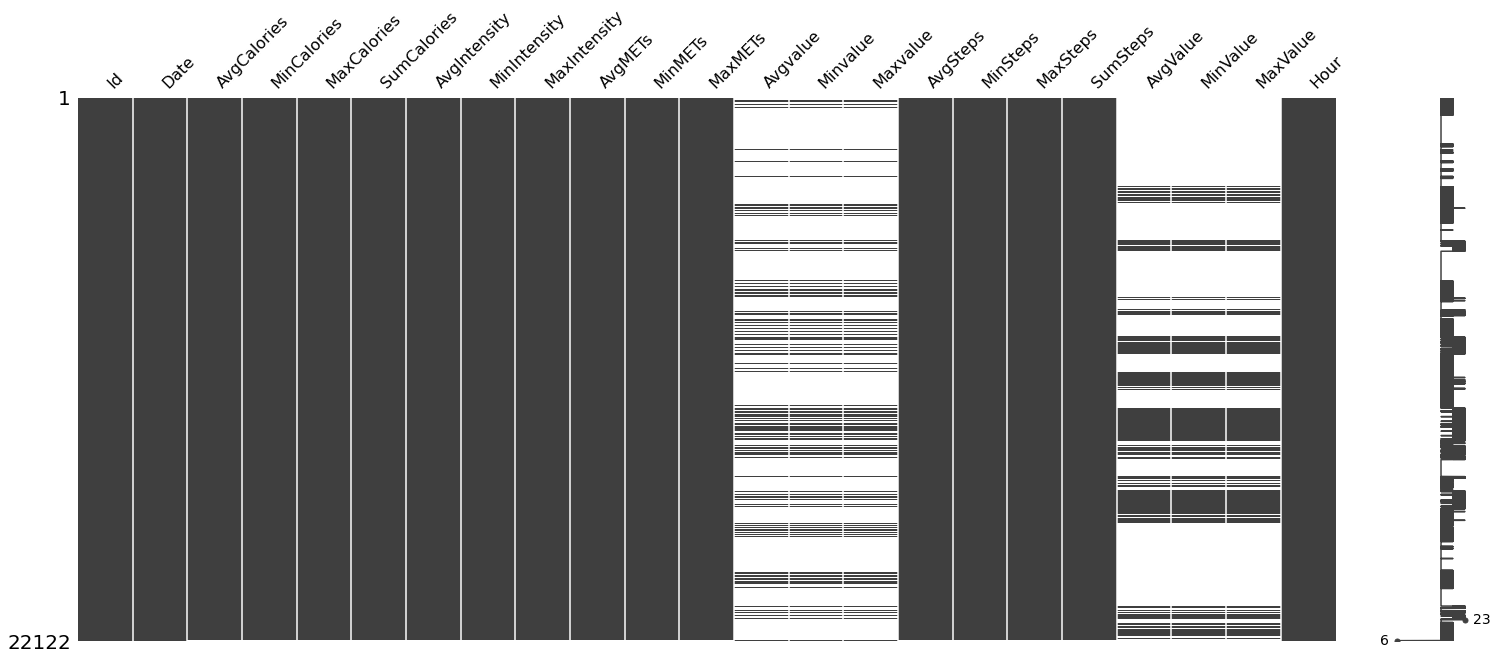

In [69]:
msno.matrix(minute_df)
plt.show()

## Save the dataset

In [70]:
minute_df.to_csv('FitBit-Tracker-Data/Generated-Data/minute.csv', index=False)